# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [7]:
# Load the library packages
library(tidyverse)
library(dplyr)
library(class)
library(ggplot2)
library(magrittr)

# Simplier name for data set
d <- diamonds

d <- d %>%
  mutate(price_bin = if_else(price > mean(price), 1, 0)) %>%
  mutate(price_bin = as.factor(price_bin))

# Select only required columns
d <- d %>%
  select(carat, depth, table, x, y, price_bin)

# Print first few rows of the data
head(d)

# Print the dimensions of the data set
dim(d)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

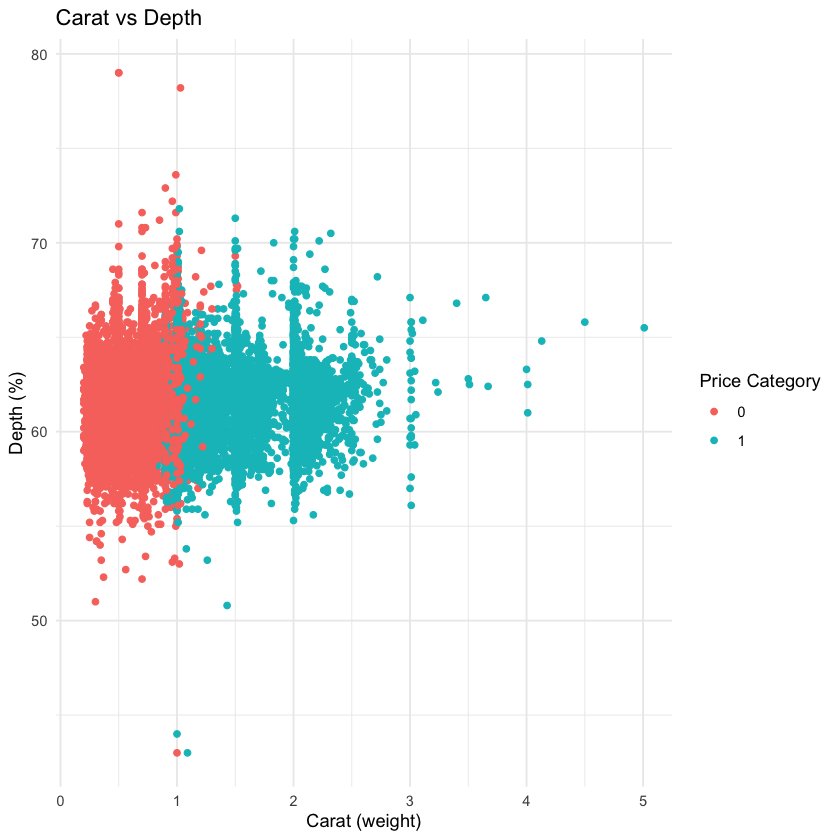

In [13]:
ggplot(d, aes(x = carat, y = depth, color = price_bin)) +
  geom_point() +
  labs(title = "Carat vs Depth",
      x = "Carat (weight)",
      y = "Depth (%)",
      color = "Price Category") +
      theme_minimal()


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *Between carat and depth, carat will give better data points for kNN to work with, but only on the higher weight edges as there is significant overlap in the majority of the data points so anything but edge work will likely not return helpful resuts. Carat is a better predictor of price class as above a certain weight (approximately "1") the price is consistently greater than the mean, presumably increasing commensurately with weight.*
>
> *


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [43]:
set.seed(2023)

# pull random sample of 30% of indices
test_indices <- sample(1:nrow(d), size = nrow(d) * 0.3)

# the rest of the indices are the training set
test_set <- d[test_indices, ]
train_set <- d[-test_indices, ]

# See top of data sets
head(test_set)
head(train_set)

# Print the dimensions of the data set
print(dim(test_set))
print(dim(train_set))

carat,depth,table,x,y,price_bin,is.test,is.train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>
1.22,62.3,56.0,6.81,6.84,1,TRUE,FALSE
1.57,62.3,56.0,7.48,7.41,1,TRUE,FALSE
1.11,62.4,57.7,6.57,6.64,1,TRUE,FALSE
0.42,60.6,57.0,4.82,4.85,0,TRUE,FALSE
0.32,62.6,55.0,4.39,4.36,0,TRUE,FALSE
0.90,62.7,58.0,6.06,6.15,1,TRUE,FALSE


carat,depth,table,x,y,price_bin,is.test,is.train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE,TRUE
0.23,56.9,65,4.05,4.07,0,FALSE,TRUE
0.29,62.4,58,4.20,4.23,0,FALSE,TRUE
0.31,63.3,58,4.34,4.35,0,FALSE,TRUE
0.24,62.8,57,3.94,3.96,0,FALSE,TRUE
0.24,62.3,57,3.95,3.98,0,FALSE,TRUE


[1] 16182     8
[1] 37758     8


## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [45]:
set.seed(2023)
library(class)

# training data pull the training rows
train.pred <- cbind(train_set$carat, train_set$depth)
train.spec <- train_set$price_bin

# testing data pull the testing rows
test.pred <- cbind(test_set$carat, test_set$depth)
test.spec <- test_set$price_bin

# run knn
knn.pred <- knn(train = train.pred, test = test.pred, cl = train.spec, k = 3)

#print first few rows of the prediction
head(knn.pred)

[1] 1 1 1 0 0 1
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [46]:
# confusion matrix
table(knn.pred, test.spec)
accuracy <- sum(knn.pred == test.spec) / length(test.spec)
print(paste("Accuracy: ", round(accuracy * 100, 2), "%"))

# Calculate test error rate
test_error <- mean(knn.pred != test.spec)
print(paste("Test error rate:", round(test_error * 100, 2), "%"))


        test.spec
knn.pred    0    1
       0 9707  316
       1  539 5620

[1] "Accuracy:  94.72 %"
[1] "Test error rate: 5.28 %"


How did your model perform?
> *Very well, 94.7% and with a pretty low test error rate.*


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [49]:
set.seed(2023)
library(class)

# Training data (use only train_set rows)
train.pred.full <- train_set[, c("carat", "depth", "table", "x", "y")]
train.spec.full <- train_set$price_bin

# Testing data (use only test_set rows)
test.pred.full <- test_set[, c("carat", "depth", "table", "x", "y")]
test.spec.full <- test_set$price_bin

# Run knn (with parameters in correct order)
knn.pred.full <- knn(train = train.pred.full, test = test.pred.full, cl = train.spec.full, k = 3)

# Print first few rows of the prediction
head(knn.pred.full)

# Create confusion matrix
conf_matrix <- table(Actual = test.spec.full, Predicted = knn.pred.full)
print(conf_matrix)
accuracy <- sum(knn.pred.full == test.spec.full) / length(test.spec.full)
print(paste("Accuracy: ", round(accuracy * 100, 2), "%"))

# Calculate error rate
error_rate <- mean(knn.pred.full != test.spec.full)
print(paste("Error rate:", round(error_rate * 100, 2), "%"))

[1] 1 1 1 0 0 1
Levels: 0 1

      Predicted
Actual    0    1
     0 9728  518
     1  391 5545
[1] "Accuracy:  94.38 %"
[1] "Error rate: 5.62 %"


Did your model predictions improve?
> *I didn't change in a significant way. The model seems like a good fit.*


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [50]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [52]:
for (k in seq(1:30)) {
    knn_fits  <- knn(train = train.pred, test = test.pred, cl = train.spec, k = k)

    #overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = test.spec)
    output$error[k]  <- mean(conf_df$predicted != conf_df$actual)
}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05388703
2,2,0.05333086
3,3,0.05320727
4,4,0.05326906
5,5,0.05209492
6,6,0.05258930


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


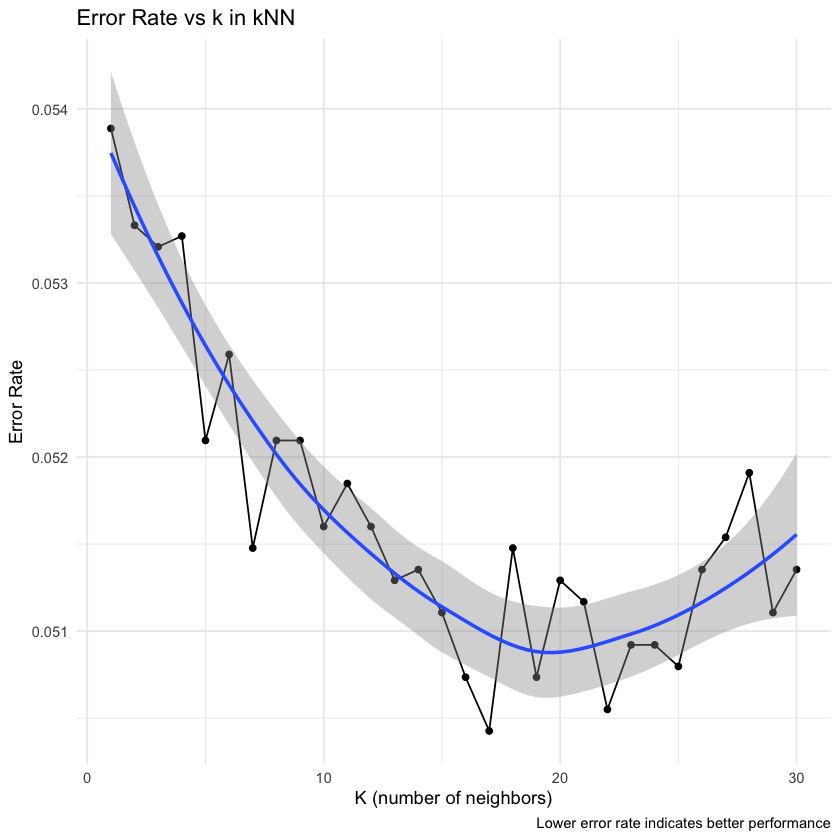

In [62]:
library(ggplot2)

ggplot(output, aes(x = k, y = error)) +
  geom_line() +
  geom_point() + 
  geom_smooth(method = "loess", se = TRUE) +
    labs(title = "Error Rate vs k in kNN",
       x = "K (number of neighbors)",
       y = "Error Rate",
       caption = "Lower error rate indicates better performance") +
  theme_minimal()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *The best k is ~16 or 17 and you can see it gets to the lowest error rate of below 0.050 as compared to a lower k which has error rates closer to 0.054. Generally, increasing k improves the model, but there is another significant dip in performance at appproximately k = 18-21 and 26-28.*



# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [66]:
set.seed(2023)

# add predictors
train.pred.std <- cbind(scale(train_set$carat), scale(train_set$depth))
test.pred.std <- cbind(scale(test_set$carat), scale(test_set$depth))

# run knn
knn.pred.std <- knn(train = train.pred.std, test = test.pred.std, cl = train.spec, k = 16)

# confusion matrix
conf_matrix <- table(knn.pred.std, test.spec)
print(conf_matrix)
accuracy <- sum(knn.pred.std == test.spec) / length(test.spec)
print(paste("Accuracy: ", round(accuracy * 100, 2), "%"))

# Calculate test error rate
test_error <- mean(knn.pred.std != test.spec)
print(paste("Test error rate:", round(test_error * 100, 2), "%"))



            test.spec
knn.pred.std    0    1
           0 9712  291
           1  534 5645
[1] "Accuracy:  94.9 %"
[1] "Test error rate: 5.1 %"


What impact did rescaling the data have on your error rate?
> * *Rescaling made for a higher, and therefore worse, error rate. But likely not to a significant level.*
>
> *


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *my coding tutor, claude.ai*
>
>
